In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datos_limpios/cln_extrusion.csv')
df.describe()

,TURNO,EXTRUSORA,N° DE ROLLO,CALIBRE PEDIDO,CALIBRE REAL,PRODUCTO CONFORME,BASURA,HORAS DE TRABAJO,month,day,year,week_chida,SEMANA
count,9883.000000,9883.000000,9883.000000,9882.000000,9831.000000,9873.000000,9854.000000,9883.000000,9884.000000,9884.000000,9884.0,9884.000000,9884.000000
mean,2.004654,8.106648,7.194678,108.210923,102.807152,91.497721,0.069799,2.926452,4.899332,15.904593,2019.0,19.734015,19.715500
std,0.808763,3.037871,7.255489,91.740121,316.383239,57.582193,0.389564,1.991602,2.544928,8.901618,0.0,11.070477,11.070552
min,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-26.330000,1.000000,1.000000,2019.0,1.000000,1.000000
25%,1.000000,6.000000,2.000000,28.000000,28.900000,48.000000,0.000000,1.680000,3.000000,8.000000,2019.0,10.000000,10.000000
50%,2.000000,8.000000,5.000000,77.000000,60.500000,90.000000,0.000000,2.700000,5.000000,16.000000,2019.0,19.000000,19.000000
75%,3.000000,11.000000,10.000000,167.400000,170.600000,133.000000,0.000000,3.750000,7.000000,24.000000,2019.0,29.000000,29.000000
max,3.000000,13.000000,45.000000,550.000000,29092.000000,279.000000,30.000000,27.120000,10.000000,31.000000,2019.0,40.000000,40.000000


In [3]:
df.dtypes

FECHA                      object
TURNO                     float64
EXTRUSORA                 float64
OPERADOR                   object
N° DE PEDIDO               object
NOMBRE DE PEDIDO           object
CLAVE SAP                  object
TIPO DE PRODUCTO           object
MEDIDA DE LA BOLSA         object
TRATADO                    object
ANCHO DE PELICULA          object
N° DE ROLLO               float64
CALIBRE PEDIDO            float64
CALIBRE REAL              float64
MOTIVO DEL CORTE           object
HORA INICIO                object
HORA FINAL                 object
KILOS/HORA                 object
PRODUCTO CONFORME         float64
% DE PRODUCTO CONFORME     object
RECUP.                     object
% DE RECUP                 object
BASURA                    float64
% DE BASURA                object
CONSUMO MP                 object
% MATERIA PRIMA            object
HORAS DE TRABAJO          float64
month                       int64
day                         int64
year          

### Pregunta 7. 
**¿Cómo se compara la distribución del calibre pedido en la base de datos de extrusion con el calibre real en la misma base de datos?**

In [4]:
# se obtiene  el número de valores faltantes y se rellenan con splines
cols = ['CALIBRE PEDIDO', 'CALIBRE REAL']
df[cols].isnull().sum()

CALIBRE PEDIDO     2
CALIBRE REAL      53
dtype: int64

In [5]:
# se rellenan los datos faltantes con interpolacion
df[cols] = df[cols].interpolate()

In [6]:
df[cols].describe()

,CALIBRE PEDIDO,CALIBRE REAL
count,9884.000000,9884.000000
mean,108.201509,102.700203
std,91.734477,315.569923
min,0.000000,0.000000
25%,28.000000,28.900000
50%,77.000000,60.500000
75%,167.400000,170.520000
max,550.000000,29092.000000


Se puede observar por la descripción de los datos que los primeros tres cuartiles son consistentes a diferencia del último que parece contener _outliers_ con valores muy altos, dado que el máximo en el calibre real está en el orden 1x10^4. A continuación se realizan unas gráficas de caja para observar este frnómeno.

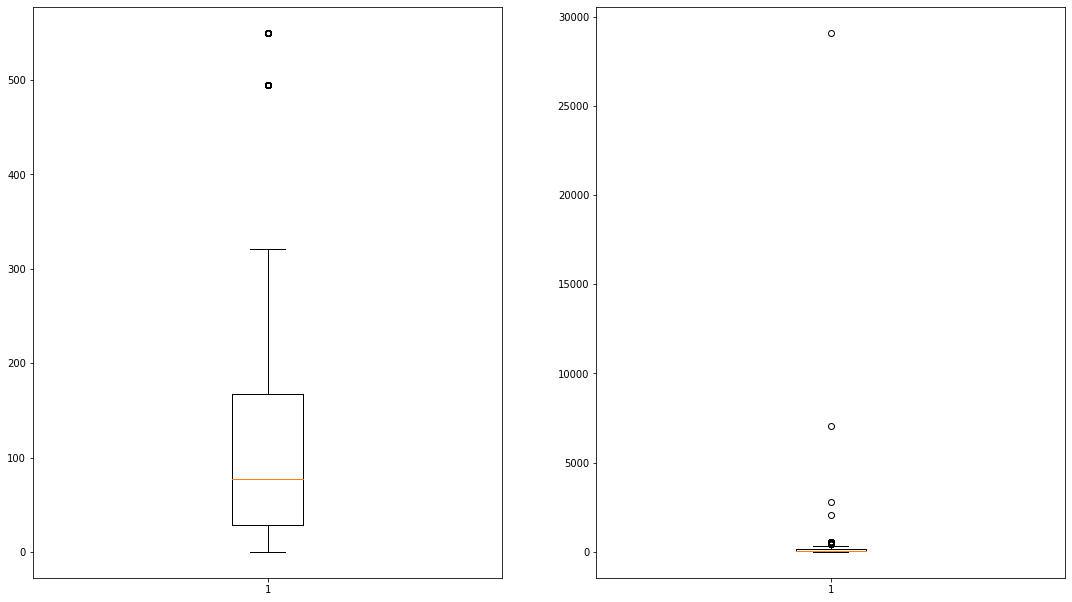

In [7]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)

plt.subplot(1, 2, 1)
#plt.hist(df['CALIBRE PEDIDO'], bins=200)
plt.boxplot(df['CALIBRE PEDIDO'])
plt.title = 'CALIBRE PEDIDO'

plt.subplot(1, 2, 2)
#plt.hist(df['CALIBRE REAL'], bins=200)
plt.boxplot(df['CALIBRE REAL'])
plt.title = 'CALIBRE REAL'

plt.show()

Como se puede observar en el caso del **calibre pedido** la mayoría de los datos se concentran entre los valores 50 y 200, en el caso del **calibre real** parece que también, a continuación se eliminan los outliers y se plotean gráficas de caja e historgramas para verificar sus distribuciones.

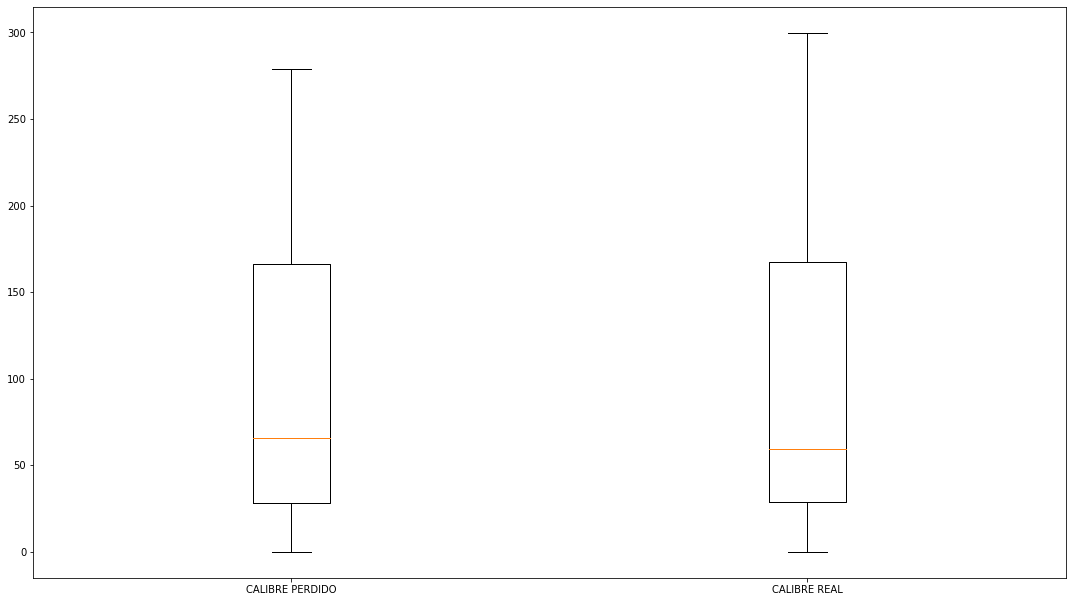

In [8]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)

plt.boxplot([df[df[cols[0]] < 300][cols[0]], df[df[cols[1]] < 300][cols[1]]], 
            labels=['CALIBRE PERDIDO', 'CALIBRE REAL'])

plt.show()

In [9]:
print(df[df[cols[0]] < 300][cols[0]].describe()) # calibre perdido
print(df[df[cols[1]] < 300][cols[1]].describe()) # calibre real

count    9596.000000
mean       98.372417
std        71.202684
min         0.000000
25%        28.000000
50%        66.000000
75%       166.250000
max       279.000000
Name: CALIBRE PEDIDO, dtype: float64
count    9618.000000
mean       89.686800
std        74.200844
min         0.000000
25%        28.800000
50%        59.290000
75%       167.695000
max       299.700000
Name: CALIBRE REAL, dtype: float64


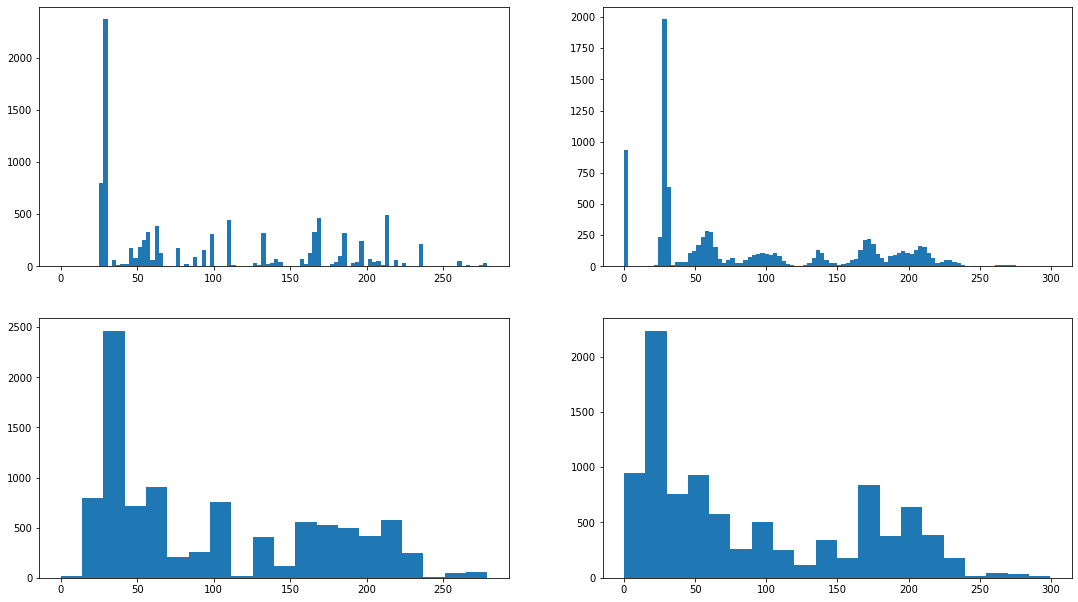

In [10]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)

plt.subplot(2, 2, 1)
plt.hist(df[df[cols[0]] < 300][cols[0]], bins=100)
plt.title = 'CALIBRE PEDIDO 100 bins'

plt.subplot(2, 2, 2)
plt.hist(df[df[cols[1]] < 300][cols[1]], bins=100)
plt.title = 'CALIBRE REAL 100 bins'

plt.subplot(2, 2, 3)
plt.hist(df[df[cols[0]] < 300][cols[0]], bins=20)
plt.title = 'CALIBRE PEDIDO 20 bins'

plt.subplot(2, 2, 4)
plt.hist(df[df[cols[1]] < 300][cols[1]], bins=20)
plt.title = 'CALIBRE REAL 20 bins'

plt.show()

Por lo que se puede observar en las gráficas de cajas ambas distribuciones son muy similares, esto también se ve reflejado en la descripción de los datos en la media y la desviación estandar. La diferencia entre ambas distribuciones puede notarse más en los histogramas. Con 20 bins se pueden notar ligeras diferencias entre la distribución, más aun, con 100 bins, se alcanza a notar que en la distribución de `'CALIBRE REAL'` los valores de os datos son más variables y en la distribución de `'CALIBRE PEDIDO'` se concentra más en algunos valores.

A continuación se comparan los valores en el periodo de tiempo de ambas columnas en periodos de dia, semana y mes.

In [11]:
# parsear tipo de dato a datetime
df['fecha_chida'] = pd.to_datetime(df['fecha_chida'])

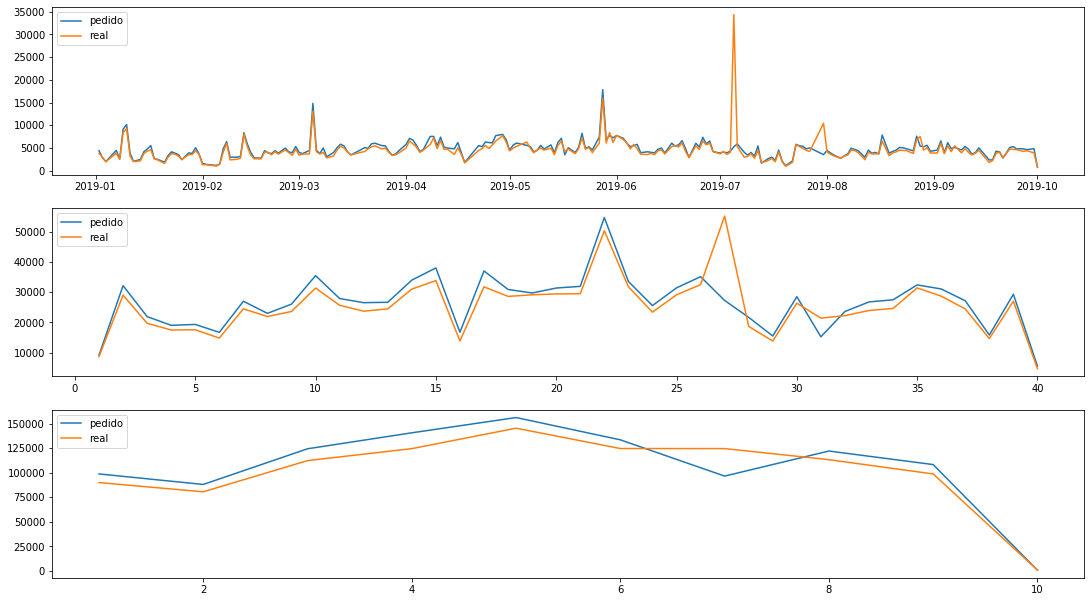

In [23]:
pedido_dia = df.groupby(['fecha_chida']).sum()['CALIBRE PEDIDO']
real_dia = df.groupby(['fecha_chida']).sum()['CALIBRE REAL']

pedido_mes = df.groupby(['month']).sum()['CALIBRE PEDIDO']
real_mes = df.groupby(['month']).sum()['CALIBRE REAL']

pedido_sem = df.groupby(['week_chida']).sum()['CALIBRE PEDIDO']
real_sem = df.groupby(['week_chida']).sum()['CALIBRE REAL']


fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)

plt.subplot(3,1,1)
plt.plot(pedido_dia.index, pedido_dia, label='pedido')
plt.plot(real_dia.index, real_dia, label='real')
plt.legend(loc='upper left')

plt.subplot(3,1,2)
plt.plot(pedido_sem.index, pedido_sem, label='pedido')
plt.plot(real_sem.index, real_sem, label='real')
plt.legend(loc='upper left')

plt.subplot(3,1,3)
plt.plot(pedido_mes.index, pedido_mes, label='pedido')
plt.plot(real_mes.index, real_mes, label='real')
plt.legend(loc='upper left')

plt.show()

Como se puede observar en las series de tiempo se confirma, en su mayoría, la similitud de las distribuciones a excepción del mes de julio donde se observa una diferencia notable entre el pedido y el real, lo que motiva a una rervisión en los procesos de esas fechas para buscar la posible causa de este fenómeno.

### Pregunta 8
**¿Cual es la distribucion del calibre reportado al termino del proceso de sellado a lo largo de todo el periodo de tiempo?**

In [13]:
df2 = pd.read_csv('datos_limpios/cln_sellado.csv', index_col=0)
df2.describe()

,SEMANA,TURNO,CALIBRE,GPM (Golpes por minuto),TEMPERATURA DE SELLADO (INFERIOR),TEMPERATURA DE SELLADO (SUPERIOR),PESO/BULTO,KG/DE BOBINA,N° DE BULTOS,MILLARES,PESO DE TROQUEL,MERMA EXTRUSION,MER IMPRESIÓN,MERMA SELLADO,BOLSA DE 2A,BASURA,HORAS DE TRABAJO,year,month,day
count,3768.000000,3767.000000,3689.000000,310.000000,301.000000,312.000000,3765.000000,3735.000000,3767.000000,3757.000000,3759.000000,3742.000000,3750.000000,3762.000000,3748.000000,3764.000000,3768.000000,3768.0,3768.000000,3768.000000
mean,21.351911,1.962039,138.854161,63.445161,54.358804,313.358365,159.983044,169.374570,13.180250,11.726991,5.120761,0.681414,2.283523,1.240524,0.372196,0.249474,6.221430,2019.0,5.282909,15.643843
std,10.883281,0.815342,78.363719,29.165112,91.620363,91.164622,104.898400,119.740364,15.415718,102.389524,14.256611,2.768073,4.927853,3.562329,1.994303,0.266014,2.301968,0.0,2.515068,8.905575
min,1.000000,1.000000,35.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2019.0,1.000000,1.000000
25%,13.000000,1.000000,60.000000,45.000000,0.000000,240.000000,80.000000,85.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.240000,0.000000,0.060000,4.500000,2019.0,3.000000,8.000000
50%,21.000000,2.000000,140.000000,60.000000,0.000000,325.000000,140.160000,150.000000,8.000000,6.000000,0.000000,0.000000,1.000000,0.730000,0.000000,0.160000,7.800000,2019.0,5.000000,15.000000
75%,31.000000,3.000000,200.000000,70.000000,76.000000,346.250000,220.000000,237.000000,16.000000,14.000000,0.000000,0.000000,3.000000,1.577500,0.000000,0.370000,8.000000,2019.0,8.000000,23.250000
max,40.000000,3.000000,1470.000000,140.000000,334.000000,460.000000,810.890000,902.000000,400.000000,5000.000000,113.680000,56.930000,132.530000,143.200000,41.940000,2.200000,14.700000,2019.0,10.000000,31.000000


In [14]:
# número de valores faltantes
cols = ['CALIBRE']
df2[cols].isnull().sum()

CALIBRE    79
dtype: int64

In [15]:
# llenar valores con interpolación
df2[cols] = df2[cols].interpolate()
#df2.describe()
print('valores faltantes:\n', df2[cols].isnull().sum())
df2[cols].describe()

valores faltantes:
 CALIBRE    0
dtype: int64


,CALIBRE
count,3768.000000
mean,138.632033
std,77.923589
min,35.000000
25%,60.000000
50%,140.000000
75%,200.000000
max,1470.000000


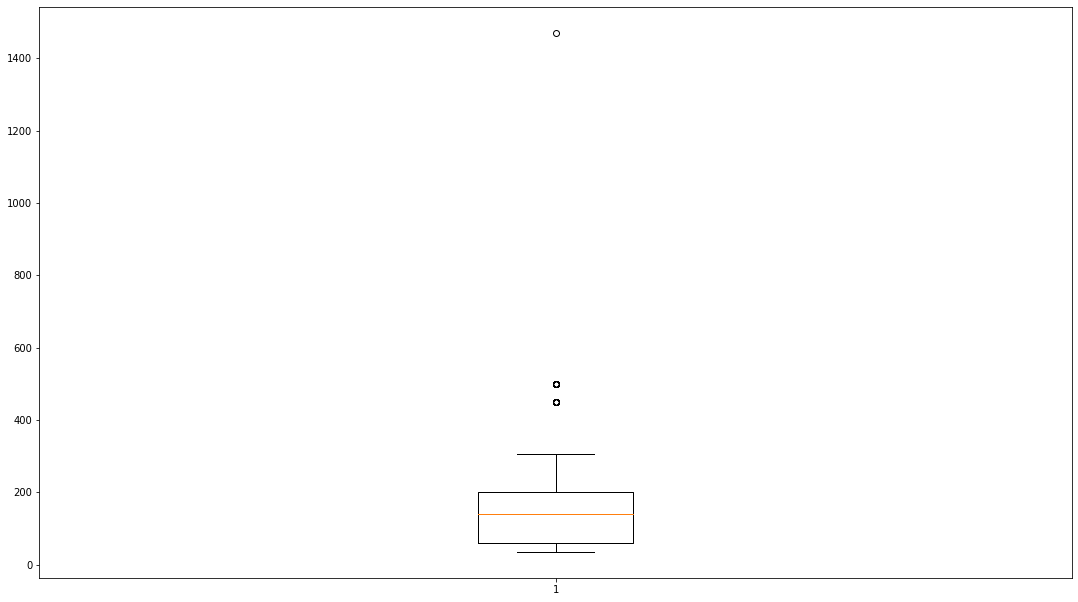

In [16]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)

plt.boxplot(df2['CALIBRE'])

plt.show()

Al igual que en la pregunta 7, en el proceso de extrusión, la mayoría de los valores se encuentran aglomerados entre 20 y 200 con algunos valores outliers fuera de este rango. Los outliers son omitidos y se vuelven a graficar los datos con un diagrama de cajas y un histograma para observar su distribución.

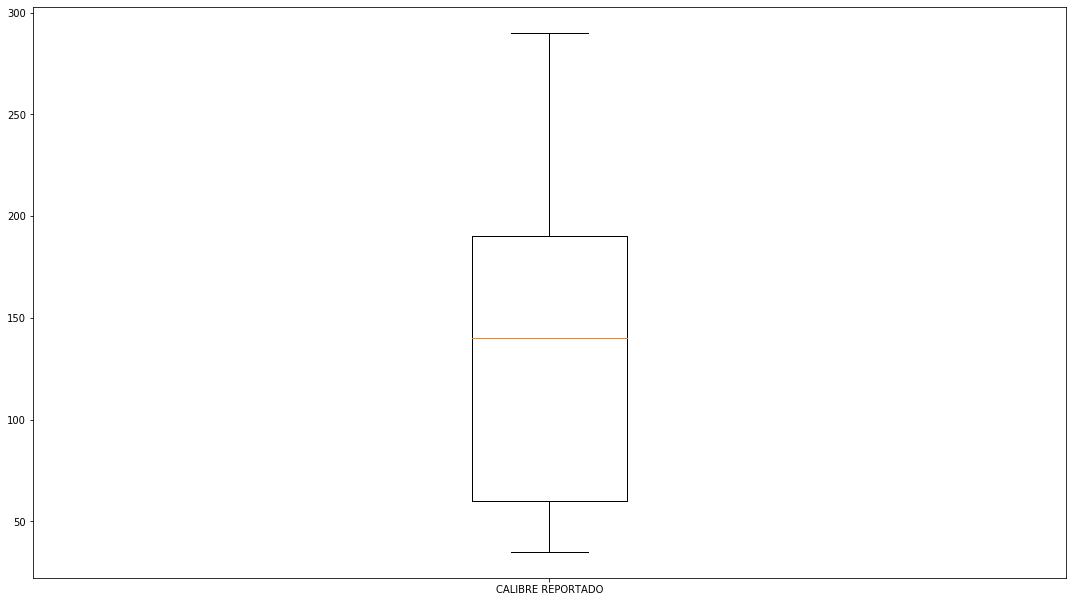

In [17]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)

plt.boxplot(df2[df2['CALIBRE'] < 300]['CALIBRE'], labels=['CALIBRE REPORTADO'])

plt.show()

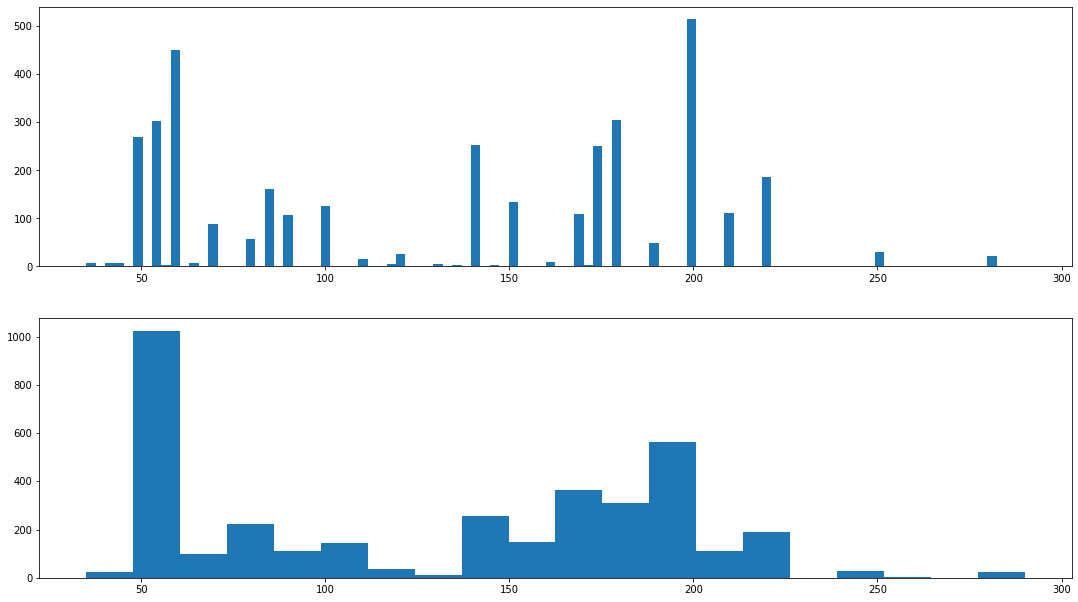

In [18]:
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)

plt.subplot(2, 1, 1)
plt.hist(df2[df2['CALIBRE'] < 300]['CALIBRE'], bins=100)
plt.title = 'CALIBRE PEDIDO 100 bins'

plt.subplot(2, 1, 2)
plt.hist(df2[df2['CALIBRE'] < 300]['CALIBRE'], bins=20)

plt.show()

Haciendo referencia a los histogramas de calibre pedido y calibre real las distribuciones son muy similares (dejando de loado los valores anómalos). A continuación se grafica la cantidad de calibre reportado después del sellado en el tiempo y posteriormente se compara con los anteriores.

In [19]:
# parsear tipo de dato a datetime
df2['FECHA'] = pd.to_datetime(df2['FECHA'])

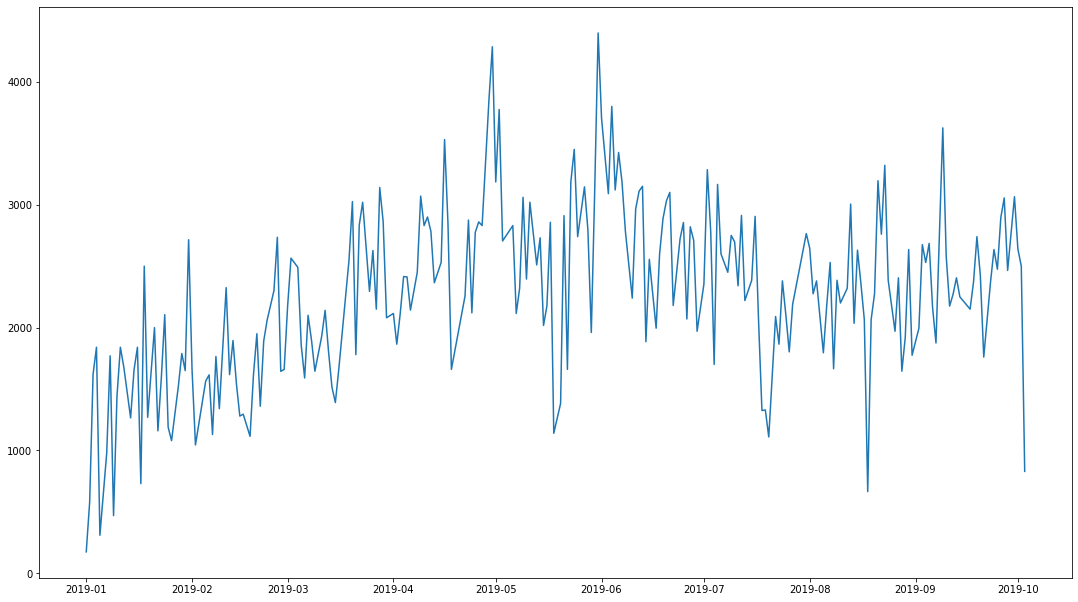

In [20]:
calibre_dia = df2.groupby(['FECHA']).sum()['CALIBRE']
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)

plt.plot(calibre_dia.index, calibre_dia)

plt.show()

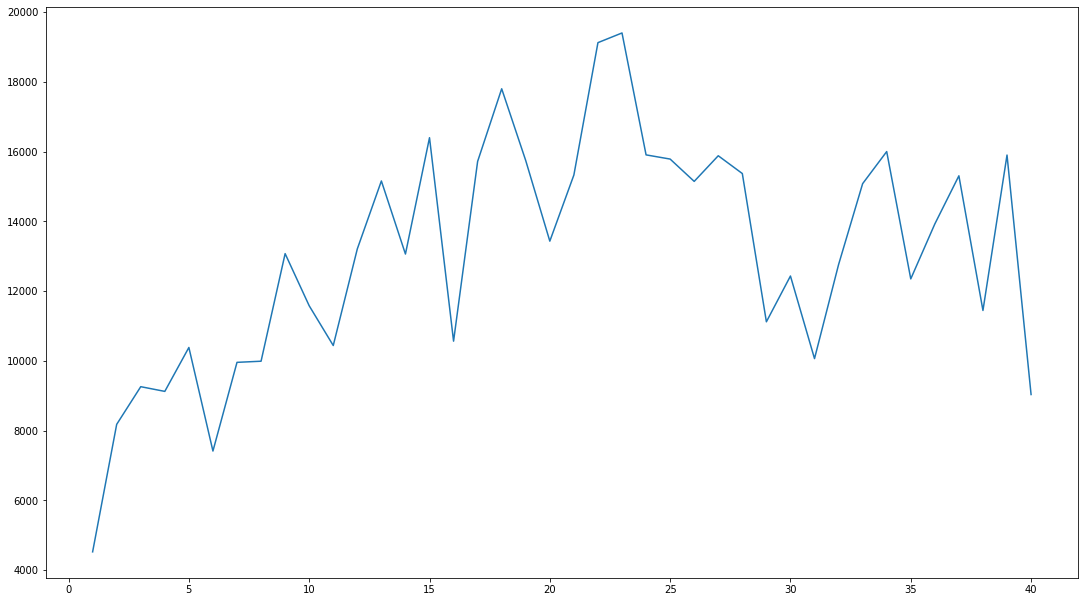

In [21]:
calibre_sem = df2.groupby(['SEMANA']).sum()['CALIBRE']
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)

plt.plot(calibre_sem.index, calibre_sem)

plt.show()

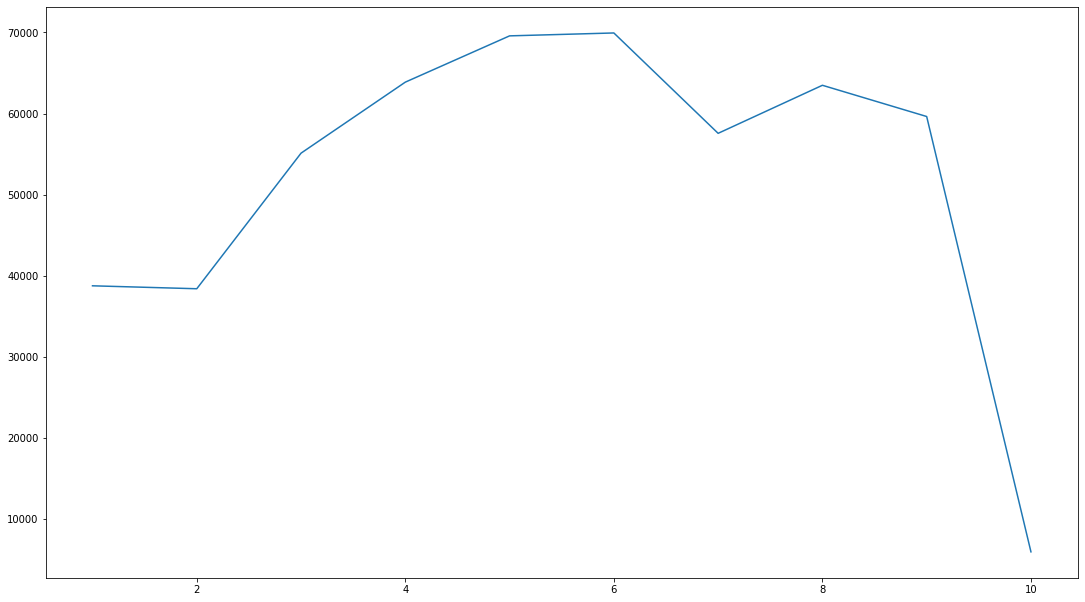

In [22]:
calibre_mes = df2.groupby(['month']).sum()['CALIBRE']
fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)

plt.plot(calibre_mes.index, calibre_mes)

plt.show()

A continuacioń se compara con los valores obtenidos en la pregunta 8.

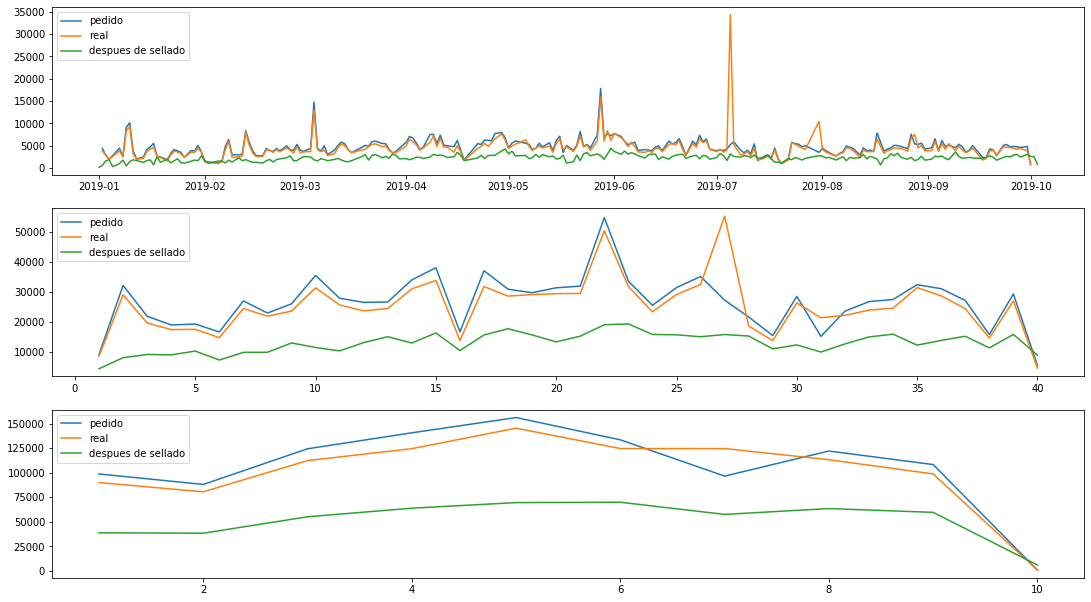

In [25]:
pedido_dia = df.groupby(['fecha_chida']).sum()['CALIBRE PEDIDO']
real_dia = df.groupby(['fecha_chida']).sum()['CALIBRE REAL']

pedido_mes = df.groupby(['month']).sum()['CALIBRE PEDIDO']
real_mes = df.groupby(['month']).sum()['CALIBRE REAL']

pedido_sem = df.groupby(['week_chida']).sum()['CALIBRE PEDIDO']
real_sem = df.groupby(['week_chida']).sum()['CALIBRE REAL']


fig = plt.figure()
fig.set_size_inches(18.5, 10.5, forward=True)

plt.subplot(3,1,1)
plt.plot(pedido_dia.index, pedido_dia, label='pedido')
plt.plot(real_dia.index, real_dia, label='real')
plt.plot(calibre_dia.index, calibre_dia, label='despues de sellado')
plt.legend(loc='upper left')

plt.subplot(3,1,2)
plt.plot(pedido_sem.index, pedido_sem, label='pedido')
plt.plot(real_sem.index, real_sem, label='real')
plt.plot(calibre_sem.index, calibre_sem, label='despues de sellado')
plt.legend(loc='upper left')

plt.subplot(3,1,3)
plt.plot(pedido_mes.index, pedido_mes, label='pedido')
plt.plot(real_mes.index, real_mes, label='real')
plt.plot(calibre_mes.index, calibre_mes, label='despues de sellado')
plt.legend(loc='upper left')

plt.show()

Como se puede observar en estas últimas gráficas, despueśde el proceso de sellado hay una importante pérdida de material, con ello se podría cuantificar la merma despúes de cada proceso.
### Pregunta 9
**Con base en los datos disponibles, que distribucion es la mas probable que describe la variable *calibre* reportada en la base de datos de sellado en todo el periodo de tiempo? Cual es el promedio de esta variable que predice esta distribucion?**

In [27]:
df2.columns

Index(['FECHA', 'SEMANA', 'TURNO', 'HORA DE INICIO', 'RESPONSABLE',
       'OPERADORES', 'NUMERO DE PEDIDO', 'SELL.', 'NOMBRE DEL PEDIDO',
       'TIPO DE BOLSA', 'MEDIDA', 'CALIBRE', 'GPM (Golpes por minuto)',
       'TEMPERATURA DE SELLADO (INFERIOR)',
       'TEMPERATURA DE SELLADO (SUPERIOR)', 'PESO/BULTO', 'KG/DE BOBINA',
       'N° DE BULTOS', 'PROMEDIO', 'MILLARES', 'SERIALIZADO INICIO',
       'SERIALIZADO FIN', 'PESO DE TROQUEL', 'MERMA EXTRUSION',
       'CAUSAS EXTRUSION', 'MER IMPRESIÓN', 'CAUSAS IMPRESIÓN',
       'IMPRESIÓN  MERMA POR PROCESO', 'MERMA SELLADO', 'CAUSAS SELLADO',
       'BOLSA DE 2A', 'ORIGEN', 'CUARENTENA', 'BASURA', 'MUESTRAS',
       'HORA FINAL', 'HORAS DE TRABAJO', 'year', 'month', 'day'],
      dtype='object')